## E07: Crear una versión preliminar del índice Dst

In [1]:
# importamos las librerías que vamos a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# nuestra librería
import ist_lib as ist

folder='dst_stations/2015-03/'
month='201503'

# observatorios usados para el índice Dst
obs=['her','hon','kak','sjg']



# Obtenemos todos los días del mes en la variable "dat"

In [2]:
# días a observar: todo el mes '01' - '31'
qs=pd.Series(range(1,32))
qs=pd.Series.tolist(qs.apply(lambda x: '{0:0>2}'.format(x)))
print(qs)

# variable para guardar todos los datos (1440 minutos) de los cuatro observatorios,
# los días necesarios
dat = np.zeros([len(obs),len(qs),1440])

# leer todos los días en calma del mes para cada observatorio (sólo la componente H (c1))
for o in obs:
    for q in qs:
        filename=folder + o + '/' + o + month + q + 'qmin.min'
        df=ist.read_im(filename=filename)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


# Obtenemos los días en calma en la variable "dat_quiets"

In [3]:
# días en calma para el mes de marzo de 2015
qs=['10','30','05','14','09']

# variable para guardar todos los datos (1440 minutos) de los cuatro observatorios,
# los días necesarios
dat_quiets = np.zeros([len(obs),len(qs),1440])

# leer todos los días en calma del mes para cada observatorio (sólo la componente H (c1))
for o in obs:
    for q in qs:
        filename=folder + o + '/' + o + month + q + 'qmin.min'
        df=ist.read_im(filename=filename)
        data=df['data']
        dat_quiets[obs.index(o)][qs.index(q)][:]=data.c1

# Observemos los datos sin la eliminación de días en calma

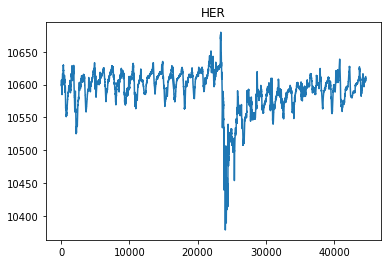

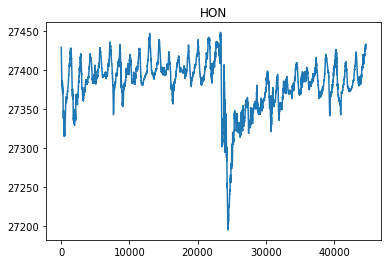

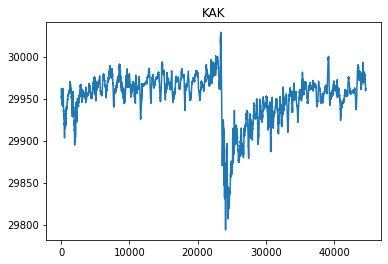

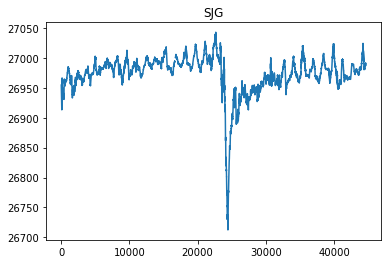

In [4]:
# Todos los días del mes para los cuatro observatorios
for io in range(4): # itera entre observatorios
    plt.plot(dat[io][:][:].reshape(-1));
    plt.title(obs[io].upper())
    plt.show()


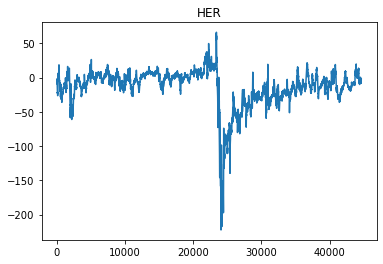

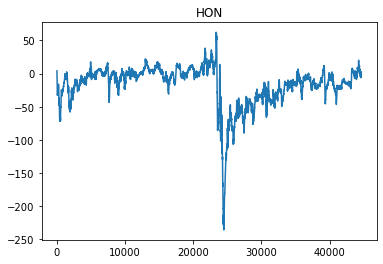

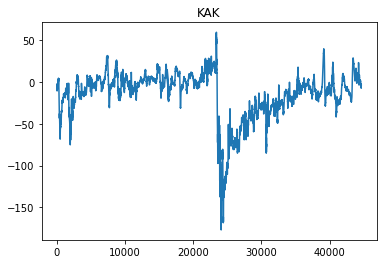

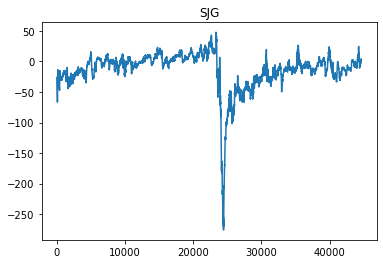

In [5]:
# Creamos el día en calma promedio para cada observatorio
quiets = np.zeros([len(obs),1440])
sq = np.zeros([len(obs),31,1440]) # variable que contiene para los cuatro obs, 31 días de 1440 minutos

for io in range(4): # itera entre observatorios
    quiets[io][:]=np.mean(dat_quiets[io][:][:],axis=0)
    for i in range(31): # Replicamos el día en calma promedio para todo el mes en los cuatro observatorios
        sq[io][i][:] = quiets[io][:]
    loc_ind=dat[io][:][:]-sq[io][i][:] # Creamos el índice restando a los datos los días en calma
    
    plt.plot(loc_ind.reshape(-1));
    plt.title(obs[io].upper())
    plt.show()

## P01: Comenta las diferencias y mejoras realizadas.

### R01:

# Creamos un índice Dst a partir de los cuatro índices locales

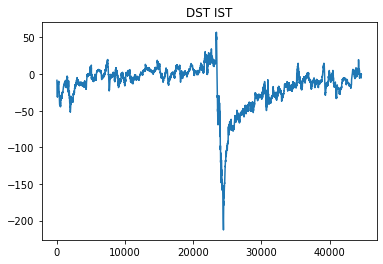

In [6]:
loc_inds = dat[:][:][:]-sq[:][:][:] # Guardamos los índices locales en una variable
dst_ist = np.mean(loc_inds,axis=0)
plt.plot(dst_ist.reshape(-1));
plt.title('DST IST')
plt.show()

## P02: ¿Cómo se ha creado esta versión del índice Dst?, comenta todos los pasos.

### R02:

## P03: Compara el resultado con el índice Dst oficial en la web de Kyoto WDC, ¿qué diferencias y/o similitudes existen?

### R03:

## A04: Compara el método oficial para obtener el Dst en la web de Kyoto WDC y comenta las diferencias más significativas.